In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [59]:
def charger_dataset(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print(f"Erreur lors du chargement du dataset: {e}")
        return None

In [60]:
filename = r"C:\Users\pc\Downloads\BIBDA\S3\Intelligence Artificielle 2\TP 3 - Enonce\spending score predict\spending score predict.csv"
data = charger_dataset(filename)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
def pretraitement_data(df):
    """
    Prétraite les données en sélectionnant les variables pertinentes et en les normalisant.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le DataFrame contenant les données brutes
    
    Returns:
    --------
    pandas.DataFrame
        Le DataFrame avec les données prétraitées
    sklearn.preprocessing.StandardScaler
        Le scaler utilisé pour la normalisation
    """
    try:
        # Copie du DataFrame pour éviter de modifier l'original
        df_prep = df.copy()
        
        # Sélection des variables pertinentes
        selected_features = ['Age', 'Gender', 'Annual Income (k$)']
        df_prep = df_prep[selected_features]
        
        # Conversion de la variable catégorielle 'Gender' en numérique
        label_encoder = LabelEncoder()
        df_prep['Gender'] = label_encoder.fit_transform(df_prep['Gender'])
        
        # Création du scaler
        scaler = StandardScaler()
        
        # Normalisation des données
        columns_to_scale = ['Age', 'Annual Income (k$)', 'Gender']
        df_scaled = pd.DataFrame(scaler.fit_transform(df_prep[columns_to_scale]), 
                               columns=columns_to_scale,
                               index=df_prep.index)
        
        return df_scaled, scaler
    
    except Exception as e:
        print(f"Erreur lors du prétraitement: {str(e)}")
        return None, None

In [112]:
data_pre, scaler = pretraitement_data(data)
print(data_pre)

          Age  Annual Income (k$)    Gender
0   -1.424569           -1.738999  1.128152
1   -1.281035           -1.738999  1.128152
2   -1.352802           -1.700830 -0.886405
3   -1.137502           -1.700830 -0.886405
4   -0.563369           -1.662660 -0.886405
..        ...                 ...       ...
195 -0.276302            2.268791 -0.886405
196  0.441365            2.497807 -0.886405
197 -0.491602            2.497807  1.128152
198 -0.491602            2.917671  1.128152
199 -0.635135            2.917671  1.128152

[200 rows x 3 columns]


In [113]:
def application_kmeans(data_pre, n_clusters):
    try:
        # Vérifier le type et la forme des données d'entrée
        if isinstance(data_pre, tuple):
            # Si les données sont passées sous forme de tuple, on extrait le premier élément
            data_pre = data_pre[0]
        
        if isinstance(data_pre, pd.DataFrame):
            # Si les données sont un DataFrame, on les convertit en tableau NumPy
            data_pre = data_pre.to_numpy()
        
        # Vérifier que les données ont une forme 2D
        if data_pre.ndim == 1:
            data_pre = data_pre.reshape(-1, 1)
        
        # Création et entraînement du modèle K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_pre)
        
        # Affichage de tous les résultats de clustering
        np.set_printoptions(threshold=np.inf)
        print(labels)
        
        return labels
    
    except Exception as e:
        print(f"Erreur lors de l'application de K-Means: {str(e)}")
        return None

In [114]:
labels = application_kmeans(data_pre,4)
#print(labels)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[3 3 2 2 2 2 2 2 1 2 1 2 2 2 3 3 2 3 1 2 3 3 2 3 2 3 2 3 2 2 1 2 1 3 2 2 2
 2 2 2 1 3 1 2 2 2 2 2 2 2 2 3 2 1 2 1 2 1 2 1 1 3 1 2 1 3 2 1 3 2 1 2 1 1
 1 3 2 3 2 2 1 3 1 2 2 1 0 2 2 0 1 3 1 0 2 3 0 2 1 3 2 0 1 3 1 2 1 1 1 1 1
 2 0 3 2 2 1 0 0 0 3 0 0 3 0 0 3 3 1 3 1 3 0 0 3 0 0 3 3 0 0 3 0 0 3 3 1 0
 0 3 3 3 0 0 0 0 3 0 3 0 0 0 3 0 1 0 3 0 0 3 3 3 3 3 0 0 1 3 1 3 0 0 3 0 0
 3 0 3 0 0 0 0 3 0 0 0 0 3 3 3]


In [115]:
def visualize_clusters(data, labels, n_clusters):
    """
    Visualise les clusters créés par KMeans.
    Cette fonction crée une matrice de diagrammes de dispersion pour visualiser les relations entre les variables et la classification.
    Args:
        data: Le DataFrame original avec les données.
        labels: Les étiquettes de cluster attribuées par KMeans.
        n_clusters: Le nombre de clusters.

    """
    features_to_plot = ['Age', 'Annual Income (k$)', 'Gender'] # pour la visualisation
    try:
        data_with_clusters = data.copy()
        data_with_clusters['cluster'] = labels


        # Visualisation (Scatter Matrix avec Plotly) 
        fig = px.scatter_matrix(data_with_clusters, 
                                dimensions=features_to_plot, 
                                color='cluster',
                                hover_data=['Spending Score (1-100)'], 
                                title=f'Clusters (k={n_clusters})')
        fig.show()
    except Exception as e:
        print(f"Erreur lors de la visualisation: {e}")


In [116]:
visualize_clusters(data,labels,4)

In [117]:
def elbow_method(X, max_clusters):
    """
    Calcule et affiche l'inertie pour différents nombres de clusters (méthode du coude).
    Args:
       X: Les données à regrouper (matrice numpy).
       max_clusters: Le nombre maximum de clusters à tester.
    """
    inertias = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        # affiche la valeur inertia_, Plus la valeur de inertia_ est faible, meilleur est le clustering. 
        # Cela signifie que les points sont bien regroupés dans leurs clusters respectifs.
        print(kmeans.inertia_)
        inertias.append(kmeans.inertia_)


    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Méthode du coude pour déterminer le meilleur k")
    plt.grid(True)
    plt.show()

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



398.62261890894285


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



309.1249680136411


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



236.6300953379336


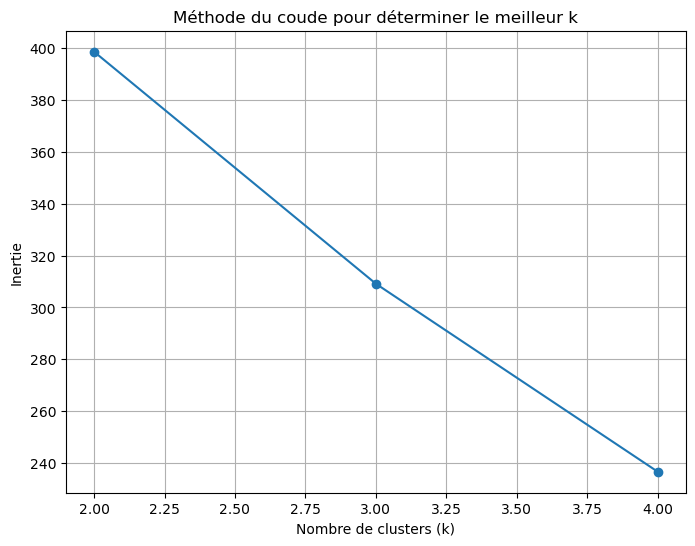

In [118]:
elbow_method(data_pre,4)